In [103]:
import spacy
import pandas as pd
import os
import kagglehub
nlp = spacy.load("en_core_web_sm")

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(["Wonder Woman is wearing a suit set"])
v.vocabulary_

{'wonder': 5, 'woman': 4, 'is': 0, 'wearing': 3, 'suit': 2, 'set': 1}

In [105]:
v = CountVectorizer(ngram_range = (1,3))
v.fit(["Wonder Woman is wearing a suit set"])
v.vocabulary_

{'wonder': 12,
 'woman': 9,
 'is': 0,
 'wearing': 6,
 'suit': 4,
 'set': 3,
 'wonder woman': 13,
 'woman is': 10,
 'is wearing': 1,
 'wearing suit': 7,
 'suit set': 5,
 'wonder woman is': 14,
 'woman is wearing': 11,
 'is wearing suit': 2,
 'wearing suit set': 8}

In [106]:
corpus = [
    "Wonder Woman had coke",
    "Captain Marvel is having diet coke",
    "Black Widow would be having water"
]

In [107]:
def preprocess(text):
    doc = nlp(text)

    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [108]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['Wonder Woman coke',
 'Captain Marvel have diet coke',
 'black Widow have water']

In [109]:
v = CountVectorizer(ngram_range = (1,2))
v.fit(corpus_processed)
v.vocabulary_

{'wonder': 17,
 'woman': 15,
 'coke': 4,
 'wonder woman': 18,
 'woman coke': 16,
 'captain': 2,
 'marvel': 10,
 'have': 7,
 'diet': 5,
 'captain marvel': 3,
 'marvel have': 11,
 'have diet': 8,
 'diet coke': 6,
 'black': 0,
 'widow': 13,
 'water': 12,
 'black widow': 1,
 'widow have': 14,
 'have water': 9}

In [110]:
v.transform(["Black Widow eats pizza"]).toarray()

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [111]:
v.transform(["Captain America eats pizza"]).toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [112]:
path = kagglehub.dataset_download("rmisra/news-category-dataset")
# print("Path to dataset files:", path)
json_path = os.path.join(path, "News_Category_Dataset_v3.json")

## Use lines = True because JSON file is not a single valid JSON object 
## it's likely a JSON lines file, 
## where each line is a separate JSON object.

df = pd.read_json(json_path, lines=True)

In [113]:
df.shape

(209527, 6)

In [114]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [115]:
df["category"].value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [116]:
target = {
    "BUSINESS" : 0,
    "POLITICS" : 1,
    "TECH" : 2
}

In [117]:
min_samples = 1014
df_business = df[df["category"] == "BUSINESS"].sample(min_samples, random_state = 42)

In [118]:
df_politics = df[df["category"] == "POLITICS"]
sample_size = min(min_samples, len(df_politics))  
df_politics_sampled = df_politics.sample(sample_size, random_state=42)

In [119]:
df_tech = df[df["category"] == "TECH"]
sample_size = min(min_samples, len(df_tech))  
df_tech_sampled = df_tech.sample(sample_size, random_state=42)

In [120]:
## We could have used SMOTE here but just for simplicity
df_balanced = pd.concat([df_business, df_politics_sampled, df_tech_sampled], axis = 0)
df_balanced["category"].value_counts()
df_balanced["category_num"] = df_balanced["category"].map(target)

In [121]:
df_balanced.head()

,link,headline,category,short_description,authors,date,category_num
101848,https://www.huffingtonpost.com/entry/how-to-ma...,How to Manage Your Personal Brand,BUSINESS,Make no mistake: If you have a Facebook accoun...,"Kevin O'Leary, Contributor",2015-04-20,0
93655,https://www.huffingtonpost.com/entry/uber-ad-n...,It Looks Like Uber's Winning Its War With New ...,BUSINESS,Grab the popcorn.,Alexander C. Kaufman,2015-07-22,0
103195,https://www.huffingtonpost.com/entry/the-progr...,The Progressive Promise of Today's Technology,BUSINESS,"A digital policy for the new century, tailored...","Andrei Cherny, ContributorCEO, Aspiration.com",2015-04-04,0
103321,https://www.huffingtonpost.com/entry/dont-let-...,Don't Let These 5 Confusing Words Mar Your Image,BUSINESS,"Tom's an articulate physician, totally able to...","Dianna Booher, ContributorCEO, BooherResearch....",2015-04-02,0
96214,https://www.huffingtonpost.com/entry/what-you-...,What You Don't Know About Overnight Success,BUSINESS,"I've been fighting this thing for 32 years. ""O...","Grant Cardone, ContributorNew York Times bests...",2015-06-23,0


In [122]:
## Use stratify to have equal number of samples in both train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced["short_description"], df_balanced["category_num"], test_size = 0.2, random_state = 42, stratify = df_balanced.category_num)

In [123]:
print(X_train.shape)
X_train.head()

(2433,)


58902             The vehicles will see regular public use.
11641                 Play stupid games, win stupid prizes.
164297    According to numerous sources close to the sit...
24034     The three former presidents attended the openi...
162367    At least one part of the labor force has expan...
Name: short_description, dtype: object

In [124]:
y_test.value_counts()

category_num
0    203
1    203
2    203
Name: count, dtype: int64

In [125]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.55      0.77      0.64       203
           1       0.78      0.64      0.70       203
           2       0.71      0.57      0.63       203

    accuracy                           0.66       609
   macro avg       0.68      0.66      0.66       609
weighted avg       0.68      0.66      0.66       609



In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.81      0.63       203
           1       0.81      0.58      0.68       203
           2       0.73      0.53      0.61       203

    accuracy                           0.64       609
   macro avg       0.69      0.64      0.64       609
weighted avg       0.69      0.64      0.64       609



### Observation
Bag of words performs better than n-grams for the given dataset

In [127]:
y_test[:5]

117522    0
116521    1
80217     0
146550    0
193258    0
Name: category_num, dtype: int64

In [128]:
y_pred[:5]

array([0, 0, 0, 0, 0])

### Observation
Correct predictions for 3/5 instances

In [129]:
## Can preprocessing improve metrics?\
df_balanced["pre_processed_text"] = df_balanced["short_description"].apply(preprocess)

In [130]:
df_balanced.head()

,link,headline,category,short_description,authors,date,category_num,pre_processed_text
101848,https://www.huffingtonpost.com/entry/how-to-ma...,How to Manage Your Personal Brand,BUSINESS,Make no mistake: If you have a Facebook accoun...,"Kevin O'Leary, Contributor",2015-04-20,0,mistake Facebook account Instagram page Twitte...
93655,https://www.huffingtonpost.com/entry/uber-ad-n...,It Looks Like Uber's Winning Its War With New ...,BUSINESS,Grab the popcorn.,Alexander C. Kaufman,2015-07-22,0,grab popcorn
103195,https://www.huffingtonpost.com/entry/the-progr...,The Progressive Promise of Today's Technology,BUSINESS,"A digital policy for the new century, tailored...","Andrei Cherny, ContributorCEO, Aspiration.com",2015-04-04,0,digital policy new century tailor moment futur...
103321,https://www.huffingtonpost.com/entry/dont-let-...,Don't Let These 5 Confusing Words Mar Your Image,BUSINESS,"Tom's an articulate physician, totally able to...","Dianna Booher, ContributorCEO, BooherResearch....",2015-04-02,0,Tom articulate physician totally able speak mi...
96214,https://www.huffingtonpost.com/entry/what-you-...,What You Don't Know About Overnight Success,BUSINESS,"I've been fighting this thing for 32 years. ""O...","Grant Cardone, ContributorNew York Times bests...",2015-06-23,0,fight thing 32 year overnight success happen o...


In [131]:
## Use stratify to have equal number of samples in both train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced["pre_processed_text"], df_balanced["category_num"], test_size = 0.2, random_state = 42, stratify = df_balanced.category_num)

In [132]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.75      0.65       203
           1       0.76      0.67      0.71       203
           2       0.72      0.60      0.65       203

    accuracy                           0.67       609
   macro avg       0.69      0.67      0.67       609
weighted avg       0.69      0.67      0.67       609



### Observation
Preprocessing improved the metric score

In [133]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[152,  20,  31],
       [ 52, 136,  15],
       [ 60,  22, 121]])

Text(50.722222222222214, 0.5, 'Truth')

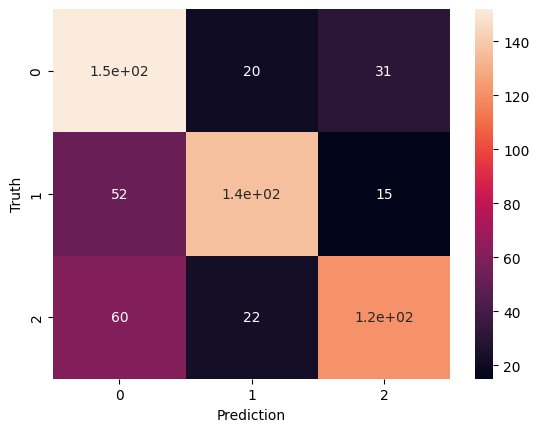

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.heatmap(cm, annot = True)
plt.xlabel("Prediction")
plt.ylabel("Truth")